In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [55]:
# Loading dataset to Pandas Dataframe
heart_data = pd.read_csv('HeartAttack.csv',na_values='?')

In [56]:
#Print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [57]:
#Print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1
293,65,1,4,130.0,275.0,0.0,1.0,115.0,1.0,1.0,2.0,NaN,NaN,1


In [58]:
#Number of rows and columns in the dataset
heart_data.shape

(294, 14)

In [59]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [60]:
#Checking for missing values
heart_data.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64

In [61]:
heart_data = heart_data.drop(columns = ["slope","ca","thal"],axis = 1)

In [62]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0


In [63]:
heart_data =heart_data.dropna()

In [64]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0


In [65]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,1
293,65,1,4,130.0,275.0,0.0,1.0,115.0,1.0,1.0,1


In [66]:
#Checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

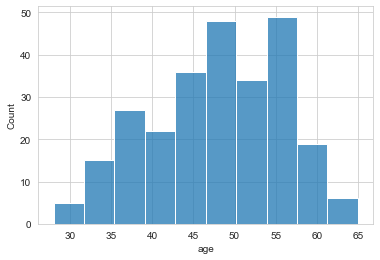

In [67]:
sns.histplot(x="age",data=heart_data)

<AxesSubplot: xlabel='sex', ylabel='count'>

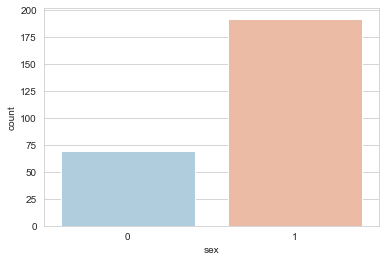

In [68]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=heart_data,palette='RdBu_r')
#1 = Male
#0 =Female

<AxesSubplot: xlabel='cp', ylabel='count'>

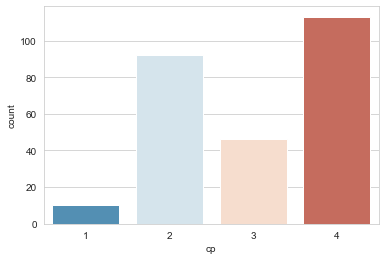

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='cp',data=heart_data,palette='RdBu_r')
#Chest Pain Type

<AxesSubplot: xlabel='trestbps', ylabel='Count'>

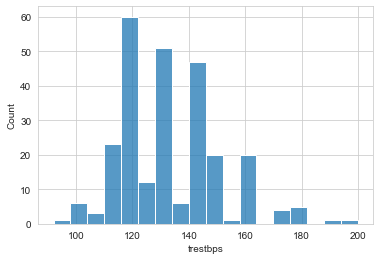

In [70]:
sns.histplot(x='trestbps',data=heart_data,palette='RdBu_r')
#resting blood pressure 

<AxesSubplot: xlabel='chol', ylabel='Count'>

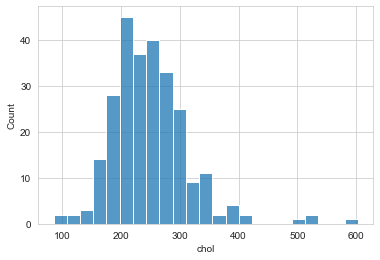

In [71]:
sns.histplot(x='chol',data=heart_data,palette='RdBu_r')
#cholestoral

<AxesSubplot: xlabel='fbs', ylabel='count'>

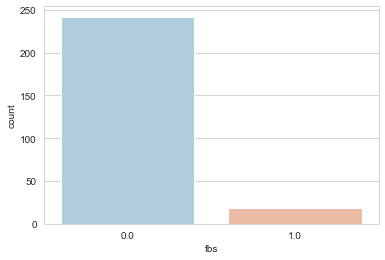

In [72]:
sns.set_style('whitegrid')
sns.countplot(x='fbs',data=heart_data,palette='RdBu_r')
#Fasting blood sugar
#1 = True
#0 = False

<AxesSubplot: xlabel='restecg', ylabel='count'>

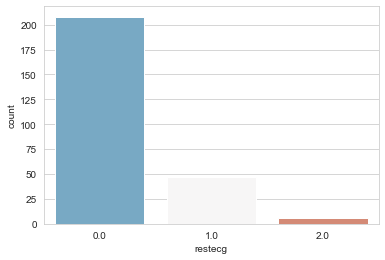

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='restecg',data=heart_data,palette='RdBu_r')
#Resting Electrocardiographic Results

<AxesSubplot: xlabel='thalach', ylabel='Count'>

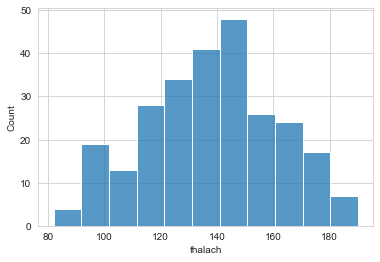

In [74]:
sns.histplot(x='thalach',data=heart_data,palette='RdBu_r')
#maximum heart rate achieved

<AxesSubplot: xlabel='exang', ylabel='count'>

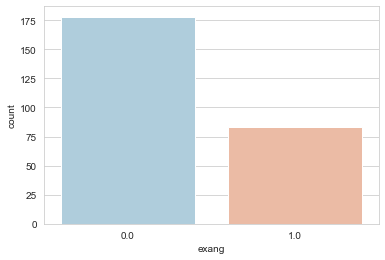

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='exang',data=heart_data,palette='RdBu_r')
#exercise induced angina 
#1 = yes
#0 = no

<AxesSubplot: xlabel='oldpeak', ylabel='Count'>

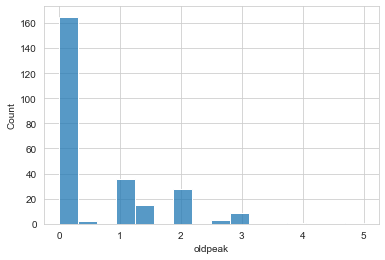

In [76]:
sns.histplot(x='oldpeak',data=heart_data,palette='RdBu_r')
#Depression induced by exercise relative to rest

<AxesSubplot: xlabel='target', ylabel='count'>

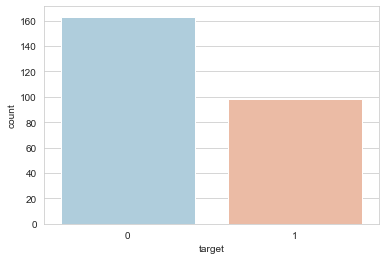

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=heart_data,palette='RdBu_r')

In [78]:
#Number of rows and columns in the dataset
heart_data.shape

(261, 11)

In [79]:
#Statistical measures of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,47.770115,0.735632,3.003831,132.639847,248.823755,0.072797,0.226054,139.226054,0.318008,0.612261,0.375479
std,7.842244,0.441843,0.970718,17.709857,65.667985,0.260302,0.470935,23.757401,0.466597,0.931914,0.485177
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,242.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,280.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


In [80]:
#Checking the distribution of Target Variable
heart_data['target'].value_counts()

0    163
1     98
Name: target, dtype: int64

In [81]:
#1 = Heart Disease
#0 = Healthy Heart

In [82]:
#Splitting the Features and Target
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [83]:
print(X)

     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak
0     28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0
1     29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0
3     30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0
4     31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0
5     32    0   2     105.0  198.0  0.0      0.0    165.0    0.0      0.0
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...
289   52    1   4     160.0  331.0  0.0      0.0     94.0    1.0      2.5
290   54    0   3     130.0  294.0  0.0      1.0    100.0    1.0      0.0
291   56    1   4     155.0  342.0  1.0      0.0    150.0    1.0      3.0
292   58    0   2     180.0  393.0  0.0      0.0    110.0    1.0      1.0
293   65    1   4     130.0  275.0  0.0      1.0    115.0    1.0      1.0

[261 rows x 10 columns]


In [84]:
print(Y)

0      0
1      0
3      0
4      0
5      0
      ..
289    1
290    1
291    1
292    1
293    1
Name: target, Length: 261, dtype: int64


In [85]:
#Splitting the Data into Training and Test data
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 2)

In [86]:
print(X.shape,X_train.shape,X_test.shape)

(261, 10) (208, 10) (53, 10)


In [87]:
#Model Training using Logistic Regression
model = LogisticRegression()

In [88]:
#Training the logistic Regression Model with Training Data
model.fit(X_train,Y_train)

LogisticRegression()

In [89]:
#Model Evaluation
#Accuracy Score of Training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [90]:
print('Accuracy on Training data: ',training_data_accuracy)

Accuracy on Training data:  0.8413461538461539


In [91]:
#Accuracy Score of Test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [92]:
print('Accuracy on Test data: ',test_data_accuracy)

Accuracy on Test data:  0.8301886792452831


In [93]:
#Predictive System
input_data = (51,1,4,130,179,0,0,100,0,0)

#change the input data to a numpy array
numpy_data = np.asarray(input_data)

#reshape the array for one instance
input_data_reshaped = numpy_data.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
    print('The person does not have a Heart Disease')
else:
    print('The person has a Heart Disease') 

[0]
The person does not have a Heart Disease
